In [1]:
import os

import sys
import pandas as pd
import datetime
import csv

In [34]:
path_results="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/results_csv/"
full_destenation="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/full_destenation/"
destenation="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/destenation/"
destenation_comma="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/destenation_comma/"
small_set="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set/"
small_set_time_int="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/"
small_set_sort="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/sorted/"
file_names = [os.path.join(path_results, f) 
                      for f in os.listdir(path_results) 
                      if f.endswith(".csv")]


#print(len(file_names))

In [3]:
def full_name_file(full_name_path):#like cs.csv
    d=full_name_path.split("/")
    ##print(d)
    name=d[len(d)-1]#.split(".")
    return name

In [4]:
def read_main_to_csv(main_file,to_file):
    f = open(main_file, "r") 
    alltext=f.read()
    dd=alltext.replace(", helwan003u1", "\nhelwan003u1")
    #print (alltext)
    #print("ddddddddddddddddddddddd")
    #print (dd)
    f.close() 
    nf = open(to_file,"w") 
    nf.write(dd)
    nf.close
    #print("ddddddd")

In [5]:
#read_main_to_csv("/home/fsg/Desktop/hh/174662.csv","/home/fsg/Desktop/hh/174662.csv")

In [6]:
import fileinput
def modify_file_2(file_name,to_file):
    f = open(file_name, "r") 
    alltext=f.read()
    alltextline=alltext.split('\n')
    #print("alltextline",len(alltextline))
    new_text=''
    
    for i in range(len(alltextline)-1):
        new_list=[]
        split_line = alltextline[i].split(',')
        
        if(i>0):
            
            
           
            #print(i,":",len(split_line))
            #print(i)
            
            #print(split_line[0])
            #print(split_line[10],split_line[24])
            split_line[10]=split_line[23]
            new_text+=" ".join(split_line[0:14])+"\n"#+" ".join(new_list_2)+"\n"
        else:
            
            new_text+=" ".join(split_line[0:])+"\n"

    f.close()
    #import csv
    nf = open(to_file,"w") 
    nf.write(new_text)
    nf.close
    

In [7]:
#modify_file_2("/home/fsg/Desktop/hh/174662.csv","/home/fsg/Desktop/hh/174662.csv")

In [8]:
def add_row_csv(path_database,idf,list_data):
    
    fd = open(path_database+idf,'w')
    fd.write(list_data)
    fd.close()
        

In [9]:
import fileinput
def modify_file_3(file_name,to_file):
    f = open(file_name, "r") 
    alltext=f.read()
    alltextline=alltext.split('\n')
    #print("alltextline",alltextline)
    
    main_row=""
    
    for i in range(len(alltextline)-1):
        row=""
        split_line = alltextline[i].split(',')
        if i>0:
            #print(split_line)
            row +=split_line[1]+","
            row +=split_line[2]+","
            row +=split_line[3]+","
            row +=split_line[5]+","
            row +=split_line[7]+","
            row +=split_line[8]+","
            row +=split_line[10]
            #print(row)

            main_row +=row+"\n"
            #main_row=" ".join(row)+"\n"
        else:
            row +="JobID,JobName,Partition,Elapsed,NodeList,ReqMem,AveRSS"
            #print(row)
            main_row +=row+"\n"

            
        
    f.close()
    #print(main_row)
    return main_row
    
    
    
    

In [10]:
#add_row_csv(small_set,"177181.csv",modify_file_3(destenation_comma+"177181.csv",small_set+"177181.csv"))

In [11]:
#modify_file_3(destenation_comma+"177181.csv",small_set+"177181.csv")

In [12]:
def replace_space_comma(destenation,destenation_comma,file_name):
    
    with open(destenation+file_name, 'r') as file :
        filedata = file.read()

    # Replace the target string
    filedata = filedata.replace(' ', ',')

    # Write the file out again
    with open(destenation_comma+file_name, 'w') as file:
         file.write(filedata)

In [13]:
def time_int(hhmmss):
    
    import datetime
    hhmmss=hhmmss.replace('-',":")
    #hhmmss = '02:29:14'
    ff=[int(x) for x in hhmmss.split(':')]
    ##print(len(ff))
    if len(ff)>3:
        
        [days,hours, minutes, seconds] = [int(x) for x in hhmmss.split(':')]
        xh = datetime.timedelta(hours=hours, minutes=minutes, seconds=seconds)
        print("x",xh.seconds,(52+35*60+7*60*60))
        xd =24*days*60*60 #datetime.timedelta(hours=24*days, minutes=0, seconds=0)
        x=xh.seconds+xd
        print("x",x)
    else:
        [hours, minutes, seconds] = [int(x) for x in hhmmss.split(':')]
        xh = datetime.timedelta(hours=hours, minutes=minutes, seconds=seconds)
        x=xh.seconds
    return x#.seconds

In [84]:
time_int('00:15:57')

957

In [15]:
def time_int_df(small_set,file_csv,small_set_time_int):
    #print(file_csv)
    
    
    articles_df = pd.read_csv(small_set+file_csv,sep=",")
    articles_df['Elapsed'] = articles_df['Elapsed'].apply(time_int)
    articles_df.to_csv(small_set_time_int+file_csv)
    ##articles_df['dd']=time_int([articles_df['Elapsed']])

In [16]:
def sort_files(job_path):
    small_set_time_int="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/"+job_path
    sorted_set_time_int="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/sorted/"+job_path
    
    small_set_int = [os.path.join(small_set_time_int, f) 
                      for f in os.listdir(small_set_time_int) 
                      if f.endswith(".csv")]
    print(small_set_int)
    
    from pandas import DataFrame
    import pandas as pd
    for f in small_set_int:
        dest_file_name=full_name_file(f)

        df=pd.read_csv(f,header=0,
                       sep=',',
                       index_col=0,)
        
        test = df.sort_values('JobID', ascending=1)
        print(dest_file_name)
        test.to_csv(sorted_set_time_int+dest_file_name)
        #test
        #return test

In [17]:
sort_files("FJ-1/")
sort_files("FJ-2/")
sort_files("FJ-3/")
sort_files("CJ-1/")
sort_files("CJ-2/")
sort_files("CJ-3/")

['/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-1/177181.csv', '/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-1/177187.csv', '/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-1/177254.csv', '/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-1/177331.csv', '/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-1/177331_2.csv']
177181.csv
177187.csv
177254.csv
177331.csv
177331_2.csv
['/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-2/177196.csv', '/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-2/177199.csv', '/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-2/177298.csv', '/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/small_set_time_int/FJ-2/177360.csv']
177196.csv
177199.csv
177298.csv
177360.csv
['/media/fsg/74C86089C8604C04/PHD/Softwa

In [18]:
def modefy_allfiles(file_names):
    for file_r in file_names:
        dest_file_name=full_name_file(file_r)
        read_main_to_csv(file_r,full_destenation+dest_file_name)
        
        modify_file_2(full_destenation+dest_file_name,destenation+dest_file_name)
        replace_space_comma(destenation,destenation_comma,dest_file_name)
        add_row_csv(small_set,dest_file_name,modify_file_3(destenation_comma+dest_file_name,small_set+dest_file_name))
        time_int_df(small_set,dest_file_name,small_set_time_int)

In [19]:
modefy_allfiles(file_names)

x 27352 27352
x 113752


In [55]:
def FJ_list(fun,pathdataset,FJ_cpu_cs,FJ_cpu_split,FJ_gpu_cs,FJ_gpu_split,i):
    FJ_cpu_cs = pd.read_csv(pathdataset+fun+FJ_cpu_cs+'.csv',sep=",")['Elapsed'][i]#['177331_1']
    print(FJ_cpu_cs)
    FJ_cpu_split = pd.read_csv(pathdataset+fun+FJ_cpu_split+'.csv',sep=",")['Elapsed'][i]#['177331_1']
    FJ_cpu_split
    FJ_gpu_cs = pd.read_csv(pathdataset+fun+FJ_gpu_cs+'.csv',sep=",")['Elapsed'][i]#['177331_1']
    FJ_gpu_cs
    FJ_gpu_split = pd.read_csv(pathdataset+fun+FJ_gpu_split+'.csv',sep=",")['Elapsed'][i]#['177331_1']
    FJ_gpu_split
    FJ=[]

    FJ.append(FJ_cpu_cs)
    FJ.append(FJ_cpu_split)
    FJ.append(FJ_gpu_cs)
    FJ.append(FJ_gpu_split)
    return tuple(FJ)

In [59]:
FJ_list('FJ-3/',small_set_sort,'177391','177385','177400','177373',2)

15


(15, 113752, 15, 36632)

In [ ]:
#'177391','177385','177400','177373'

In [22]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3+height,
                '%d' % int(height+.5),
                ha='center', va='bottom')
    

In [44]:
def list_file_job(job_path):
    sorted_list="/media/fsg/74C86089C8604C04/PHD/Softwares/ph/results_csv/sorted/"+job_path

    small_set_int_j = [os.path.join(sorted_list, f) 
                          for f in os.listdir(sorted_list) 
                          if f.endswith(".csv")]
    return small_set_int_j

In [45]:
def pure_job_name(job_path):
    
    purname_small_set_int_j=[]
    small_set_int_j=list_file_job(job_path)
    
    for f in small_set_int_j:
        dest_file_name=full_name_file(f)
        #print(dest_file_name.split('.')[0])
        pur=dest_file_name.split('.')[0]

        purname_small_set_int_j.append(pur)



    return purname_small_set_int_j

In [47]:
def plot_reuls(jobname,dataset,cpu_cs,cpu_spliit,gpu_cs,gpu_split):

    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline 
    # data to plot
    n_groups = 4
    job_name=jobname
    job_path=job_name+'/'
   
    F1 =FJ_list(job_path,dataset,cpu_cs,cpu_spliit,gpu_cs,gpu_split,0)   
    F2 =FJ_list(job_path,dataset,cpu_cs,cpu_spliit,gpu_cs,gpu_split,1)
    F3 =FJ_list(job_path,dataset,cpu_cs,cpu_spliit,gpu_cs,gpu_split,2)
    

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1
    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    rects_F1 = plt.bar(index, F1, bar_width,
                     alpha=opacity,
                     color='W',
                     label='File:1',edgecolor='black', hatch=patterns[3])

    rects_F2 = plt.bar(.1+index + bar_width, F2, bar_width,
                     alpha=opacity,
                     color='W',
                     label='File:2',edgecolor='black', hatch=patterns[5])

    rects_F3 = plt.bar(.1+index + bar_width*2+.1, F3, bar_width,
                     alpha=opacity,
                     color='W',
                     label='File:3',edgecolor='black', hatch=patterns[9])


    plt.xlabel('Processor/Dataset')
    plt.ylabel('Time(sec)')
    plt.title(job_name)
    plt.xticks(index + bar_width, ('CPU_TC1', 'CPU_TC2', 'GPU_TC1','GPU_TC2'))
    plt.legend()

    plt.tight_layout()
    autolabel(rects_F1,ax)
    autolabel(rects_F2,ax)
    autolabel(rects_F3,ax)

    #plt.show()
    plt.savefig(os.path.join(job_name+'.png'), dpi=300, format='png', bbox_inches='tight') 
    # use format='svg' or 'pdf' for vectorial pictures


['177331', '177187', '177254', '177181']
20
13
10


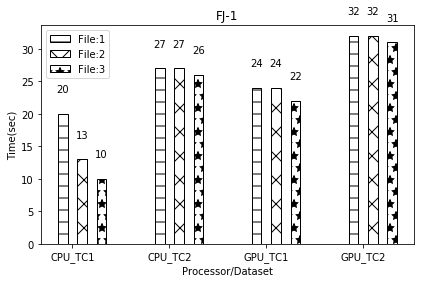

In [48]:

purname=['177331'
,'177187','177254','177181']#pure_job_name('FJ-1/')
print(purname)
plot_reuls('FJ-1',small_set_sort,purname[0],purname[1],purname[2],purname[3])

['177360', '177196', '177298', '177199']
51
129
199


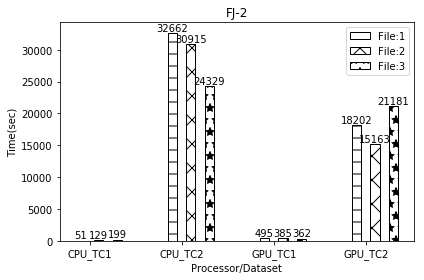

In [49]:
purname=['177360','177196','177298','177199']#pure_job_name('FJ-2/')
print(purname)
plot_reuls('FJ-2',small_set_sort,purname[0],purname[1],purname[2],purname[3])

['177391', '177385', '177400', '177373']
60
14
15


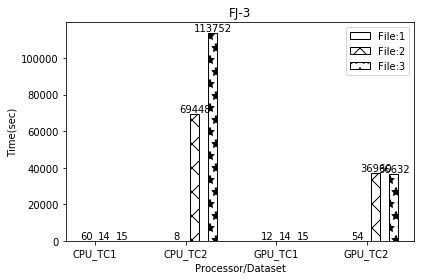

In [60]:
purname=['177391','177385','177400','177373']#pure_job_name('FJ-3/')
print(purname)
plot_reuls('FJ-3',small_set_sort,purname[0],purname[1],purname[2],purname[3])

['181025', '188572', '181006', '190276']
15
9
3


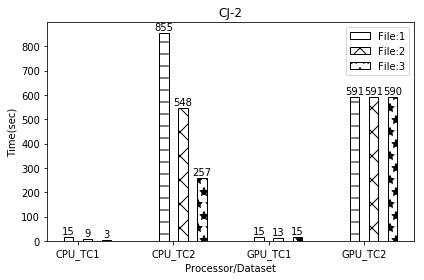

In [76]:
purname=['181025','188572','181006','190276']#pure_job_name('CJ-2/')
print(purname)
plot_reuls('CJ-2',small_set_sort,purname[0],purname[1],purname[2],purname[3])

['183171', '188575', '183173', '190279']
49
4
18


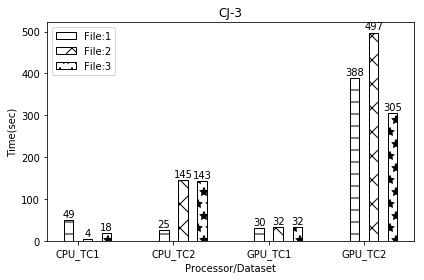

In [83]:
purname=['183171','188575','183173','190279']#pure_job_name('CJ-3/')
print(purname)
plot_reuls('CJ-3',small_set_sort,purname[0],purname[1],purname[2],purname[3])